In [1]:
import requests
from bs4 import BeautifulSoup
import time
import threading
import matplotlib.pyplot as plt

## Exercise 1 – Web API

### 1. Get one month of historical weather data (i.e. temperatures). In specific: one month of data for 5 distinct locations.
### 2. You can use any WEB service available for free (tested site: http://api.wunderground.com/api) make sure to get an API-KEY if required.
### I got the data from Dart Sky API (https://darksky.net/dev).

In [21]:
#city latitude and longitude
location = {'Shanghai':'31.2303,121.4737', 
            'Toronto': '43.6532,-79.3831',
            'Havana': '23.1135,-82.3665',
            'Evanston': '42.0450,-87.6876', 
            'London': '51.5073,-0.1277'}
#2018/09/01 ~ 2018/09/30 one month selected
dates = [str(1535760000+86400*i) for i in range(30)] #1535760000 -> 2018/09/01 00:00:00

In [22]:
LocationData = {}
for loc in location:
    city = []
    for datetime in dates:
        #request weather data from API and store it in dict called data where key = city, value = [weather information]
        weather_url = 'https://api.darksky.net/forecast/e5465730981c0c024c65c1755ee55573/' + \
            location[loc] + ',' + datetime + '?exclude=currently,minutely,alerts,flags&units=si'
        city.append(requests.get(weather_url).json())
    LocationData[loc] = city
LocationData

{'Evanston': [{'daily': {'data': [{'apparentTemperatureHigh': 29.36,
      'apparentTemperatureHighTime': 1535749200,
      'apparentTemperatureLow': 21.74,
      'apparentTemperatureLowTime': 1535796000,
      'apparentTemperatureMax': 29.36,
      'apparentTemperatureMaxTime': 1535749200,
      'apparentTemperatureMin': 14.86,
      'apparentTemperatureMinTime': 1535713200,
      'cloudCover': 0.38,
      'dewPoint': 16.88,
      'humidity': 0.74,
      'icon': 'rain',
      'moonPhase': 0.67,
      'precipIntensity': 0.1067,
      'precipIntensityMax': 0.9754,
      'precipIntensityMaxTime': 1535767200,
      'precipProbability': 0.35,
      'precipType': 'rain',
      'pressure': 1017.72,
      'summary': 'Light rain starting in the evening.',
      'sunriseTime': 1535714221,
      'sunsetTime': 1535761679,
      'temperatureHigh': 27.71,
      'temperatureHighTime': 1535749200,
      'temperatureLow': 21.13,
      'temperatureLowTime': 1535796000,
      'temperatureMax': 27.71,
  

### 3. Build a data summary table that summaries max, min, and mean values of the temperature during that month for each location selected.

In [23]:
#I want to calculate average temperature based on hourly average per day. So I am going to test weather each day has 
#complete data for 24 hours.
def getDailyHours(day):
    """
    Return how many hourly data recorded in each day.
    """
    return len(day['hourly']['data'])

all([getDailyHours(LocationData[i][j]) == 24 for i in LocationData.keys() for j in range(len(LocationData[i]))])
#since the output is True, we confirmed that every day has complete 24-hour data

True

In [24]:
# Help functions for calculating min, max, mean
def getDailyMax(day):
    """
    Get the max temperature of a day.
    """
    return day['daily']['data'][0]['temperatureMax']

def getDailyMin(day):
    """
    Get the min temperature of a day.
    """
    return day['daily']['data'][0]['temperatureMin']

def getDailyMean(day):
    """
    Calculate the mean value of temperatures in a day.
    """
    #get a list which contains temperature in each hour of the day
    dailytemp = [day['hourly']['data'][i]['temperature'] for i in range(24)]
    #find the daily mean by divided by 24
    return sum(dailytemp)/24

In [25]:
def GetSummary(citydata):
    """
    Find the summary statistics (min, max, mean) on monthly temperature data
    function input: compete data of a city
    """
    # max temperature in a month = max(daily max temperature)
    Max = max([getDailyMax(citydata[i]) for i in range(len(citydata))])
    # min temperature in a month = min(daily min temperature)
    Min = min([getDailyMin(citydata[i]) for i in range(len(citydata))])
    # mean temperature in a month = mean(daily mean temperature)
    Mean = sum([getDailyMean(citydata[i]) for i in range(len(citydata))])/len(citydata)
    return [Max, Min, Mean]

In [26]:
SummaryStat = {}
for city in LocationData.keys():
    SummaryStat[city] = GetSummary(LocationData[city])
print('Summary of Temerature Statistics in September 2018\n               in degrees Celsius')
print("-"*52)
print('City Name' + '     Max Temp' + '      Min Temp' + '    Mean Temp')
print("-"*52)
#get city name, and summary statistics and print in table format
for i, j in SummaryStat.items():
    print("{:<12}|{:<12}|{:<12}|{:<12}|".format(i, j[0], j[1], "{:.2f}".format(j[2])))
    print("-"*52)

Summary of Temerature Statistics in September 2018
               in degrees Celsius
----------------------------------------------------
City Name     Max Temp      Min Temp    Mean Temp
----------------------------------------------------
Shanghai    |33.61       |19.92       |26.20       |
----------------------------------------------------
Toronto     |32.51       |8.97        |19.66       |
----------------------------------------------------
Havana      |33.36       |21.35       |26.73       |
----------------------------------------------------
Evanston    |32.88       |4.66        |20.05       |
----------------------------------------------------
London      |24.83       |3.84        |15.25       |
----------------------------------------------------


### 4. Plot a graph that shows your data for the selected locations (to be used as comparative tool).
#### I made 4 plots in total:
     * the first one shows the summary statistics(monthly min, monthly max and monthly mean) of five cities
     * the second one is comparing daily max temperature (30 days in total) in September 2018 between five cities 
     * the third one is comparing daily min temperature in September 2018 between five cities 
     * the last one is comparing daily mean temperature in September 2018 between five cities

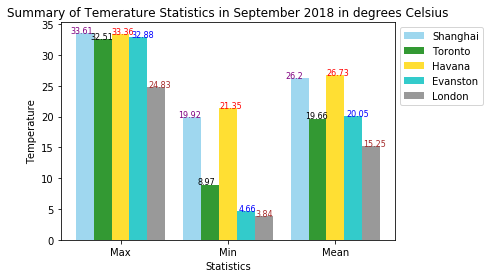

In [27]:
fig, ax = plt.subplots()
bar_width = 0.5
opacity = 0.8
#plot summary statistics of Shanghai, color = skyblue
rects1 = plt.bar([0,3,6], SummaryStat['Shanghai'], bar_width,
                 alpha=opacity,
                 color='skyblue',
                 label='Shanghai')
for i,v in enumerate(SummaryStat['Shanghai']):
    ax.text(-0.4 + i * 3, v, str(round(v,2)), color='purple', fontsize=8)

#plot summary statistics of Toronto, color = green 
rects2 = plt.bar([0.5,3.5,6.5], SummaryStat['Toronto'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Toronto')
for i,v in enumerate(SummaryStat['Toronto']):
    ax.text(0.15 + i * 3, v, str(round(v,2)), color='black', fontsize=8)

#plot summary statistics of Havana, color = gold
rects3 = plt.bar([1,4,7], SummaryStat['Havana'], bar_width,
                 alpha=opacity,
                 color='gold',
                 label='Havana')
for i,v in enumerate(SummaryStat['Havana']):
    ax.text(0.75 + i * 3, v, str(round(v,2)), color='red', fontsize=8)
    
#plot summary statistics of Evanston, color = cyan
rects4 = plt.bar([1.5,4.5,7.5], SummaryStat['Evanston'], bar_width,
                 alpha=opacity,
                 color='c',
                 label='Evanston')
for i,v in enumerate(SummaryStat['Evanston']):
    ax.text(1.3 + i * 3, v, str(round(v,2)), color='blue', fontsize=8)

#plot summary statistics of London, color = grey
rects5 = plt.bar([2,5,8], SummaryStat['London'], bar_width,
                 alpha=opacity,
                 color='grey',
                 label='London')
for i,v in enumerate(SummaryStat['London']):
    ax.text(1.77 + i * 3, v, str(round(v,2)), color='brown', fontsize=8) 

plt.xlabel('Statistics')
plt.ylabel('Temperature')
plt.title('Summary of Temerature Statistics in September 2018 in degrees Celsius')
plt.xticks([1,4,7], ('Max', 'Min', 'Mean'))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

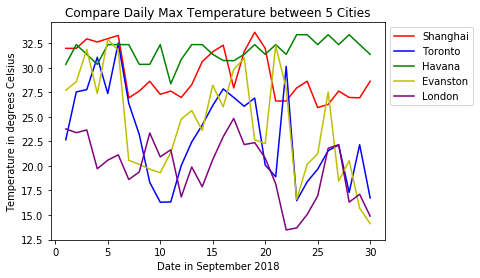

In [28]:
#Compare daily max temperature in September 2018
Date = [i for i in range(1, 31)]
plt.plot(Date, [getDailyMax(LocationData['Shanghai'][i]) for i in range(len(LocationData['Shanghai']))],
         'r', label = 'Shanghai') 
plt.plot(Date, [getDailyMax(LocationData['Toronto'][i]) for i in range(len(LocationData['Toronto']))],
         'b', label = 'Toronto') 
plt.plot(Date, [getDailyMax(LocationData['Havana'][i]) for i in range(len(LocationData['Havana']))],
         'g', label = 'Havana')
plt.plot(Date, [getDailyMax(LocationData['Evanston'][i]) for i in range(len(LocationData['Evanston']))],
         'y', label = 'Evanston')
plt.plot(Date, [getDailyMax(LocationData['London'][i]) for i in range(len(LocationData['London']))],
         'purple', label = 'London')

plt.legend(bbox_to_anchor = (1,1))
plt.title('Compare Daily Max Temperature between 5 Cities')
plt.xlabel('Date in September 2018')
plt.ylabel('Temperature in degrees Celsius')
plt.show()

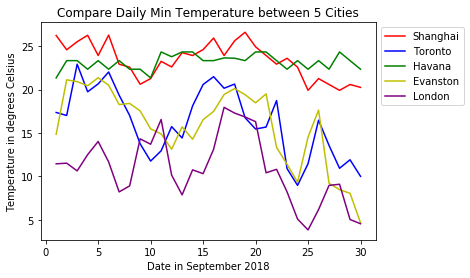

In [29]:
#Compare daily min temperature in September 2018
Date = [i for i in range(1, 31)]
plt.plot(Date, [getDailyMin(LocationData['Shanghai'][i]) for i in range(len(LocationData['Shanghai']))],
         'r', label = 'Shanghai') 
plt.plot(Date, [getDailyMin(LocationData['Toronto'][i]) for i in range(len(LocationData['Toronto']))],
         'b', label = 'Toronto') 
plt.plot(Date, [getDailyMin(LocationData['Havana'][i]) for i in range(len(LocationData['Havana']))],
         'g', label = 'Havana')
plt.plot(Date, [getDailyMin(LocationData['Evanston'][i]) for i in range(len(LocationData['Evanston']))],
         'y', label = 'Evanston')
plt.plot(Date, [getDailyMin(LocationData['London'][i]) for i in range(len(LocationData['London']))],
         'purple', label = 'London')

plt.legend(bbox_to_anchor = (1,1))
plt.title('Compare Daily Min Temperature between 5 Cities')
plt.xlabel('Date in September 2018')
plt.ylabel('Temperature in degrees Celsius')
plt.show()

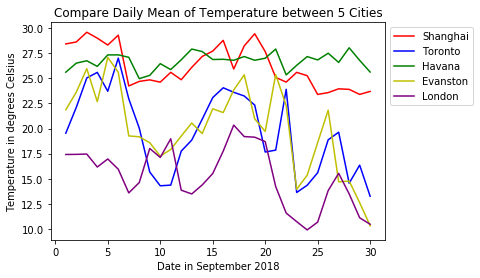

In [30]:
#Compare daily mean of temperature in September 2018
Date = [i for i in range(1, 31)]
plt.plot(Date, [getDailyMean(LocationData['Shanghai'][i]) for i in range(len(LocationData['Shanghai']))],
         'r', label = 'Shanghai') 
plt.plot(Date, [getDailyMean(LocationData['Toronto'][i]) for i in range(len(LocationData['Toronto']))],
         'b', label = 'Toronto') 
plt.plot(Date, [getDailyMean(LocationData['Havana'][i]) for i in range(len(LocationData['Havana']))],
         'g', label = 'Havana')
plt.plot(Date, [getDailyMean(LocationData['Evanston'][i]) for i in range(len(LocationData['Evanston']))],
         'y', label = 'Evanston')
plt.plot(Date, [getDailyMean(LocationData['London'][i]) for i in range(len(LocationData['London']))],
         'purple', label = 'London')

plt.legend(bbox_to_anchor = (1,1))
plt.title('Compare Daily Mean of Temperature between 5 Cities')
plt.xlabel('Date in September 2018')
plt.ylabel('Temperature in degrees Celsius')
plt.show()

## Exercise 2 – Web Scraping/Crawling (do not use the excel sheet from the site)

### one assumption:
* In each detainee's detail page, his/her name is written as [LastName],[FirstName MiddleName]. There is no clear separation between his/her first name and middle name. By observation, 
   
   * if len([FirstName MiddleName]) == 1, it's first name and there is no middle name
   * if len([FirstName MiddleName]) == 2, the first one is first name and the second one is middle name
   * if len([FirstName MiddleName]) == 3, the first one is first name and the last two are middle names
   * if len([FirstName MiddleName]) == 4, the first two are first names and the last two are middle names

### Method 1: Sequential

In [12]:
#Sequential

#initialize two empty lists for storing crime types and detainee information repectively
crime_type_seq = []
detainee_seq = []
def Scrape_All():
    """
    Scrape each detainee's FirstName, LastName, Age, # of Cases and Bail Amount from website and 
    store them in a list called detainee_seq
    Print execution time of this function
    """
    #record the start time of the function
    starttime = time.time()
    #make the detainee_seq list as global variable, so all the detainee information scraped by this function
    #can be stored in this global varibale and for future use
    global detainee_seq
    #From html source code, I found that adding max_rows = x can give a webpage with x number of detainees' information
    url = 'https://report.boonecountymo.org/mrcjava/servlet/SH01_MP.I00290s?max_rows=300' #set x = 300
    response = requests.get(url)
    html = response.content.decode('ascii')
    soup = BeautifulSoup(html, "lxml")
    url_list = soup.find_all('a', attrs = {"class": "_lookup btn btn-primary"})
    #Retrieve the url of every detainee's detail page
    detail_list = ['https://report.boonecountymo.org/mrcjava/servlet/' + url_list[i].get('href').split('&')[0] 
                   for i in range(len(url_list))]
    #Go into each detail page and scrape information needed
    for i in range(len(detail_list)):
        response = requests.get(detail_list[i])
        html = response.content.decode('ascii')
        soup= BeautifulSoup(html, "lxml")
        DetaineeName = soup.find('div', attrs = {"id": "inmateName"}).string.split(',')
        lastname = DetaineeName[0]
        #get detainee's first name based on my assumptions above
        if len(DetaineeName[1].strip().split(' ')) in [1,2,3]:
            firstname = DetaineeName[1].strip().split(' ')[0]
        else:
            firstname = ' '.join(DetaineeName[1].strip().split(' ')[1:3])
        #get age
        age = int(soup.find_all('td', attrs = {"class": "two td_left"})[-3].string)
        #get a list of cases associated with this detainee
        case = [item.string for item in soup.find_all('td', attrs = {"data-th": "CASE #"})]
        bail_str = [item.string.strip() for item in soup.find_all('td', attrs = {"data-th": "BAIL"})]
        #sum up the bail amount for each cases
        bail_amount = sum([float(''.join(bail.split(','))) for bail in bail_str if bail != ''])
        #retrieve crime description for each cases, this will be used in the last part of this question
        crime_desc = [item.string for item in soup.find_all('td', attrs = {"data-th": "CHARGE DESCRIPTION"})]
        detainee_seq.append([lastname, firstname, age, len(case), bail_amount])
        crime_type_seq.extend(crime_desc)
    print("Execution Time (Sequential): ", time.time() - starttime)

Scrape_All()

Execution Time (Sequential):  125.80869603157043


### Threading

In [13]:
#Threading

def ScrapeThread(urllist, startindex):
    """
    Scrape detainees' information (FirstName, LastName, Age, # of Cases, Bail Amount) from a given list 
    of urls (urllist) with specified start index and end index in the list.
    
    Scraped information are stored in a list called detainee_threading which will be initialized before 
    threading.
    """
    #go into every url between the start and end indices, scrape the required information
    #if end index > len(urllist), then set end index = len(urllist)
    for i in range(startindex, min(startindex + len(urllist)//10, len(urllist))): #separate the url list into 10 groups
        response = requests.get(urllist[i])
        html = response.content.decode('ascii')
        soup= BeautifulSoup(html, "lxml")
        DetaineeName = soup.find('div', attrs = {"id": "inmateName"}).string.split(',')
        lastname = DetaineeName[0]
        #get detainee's first name based on my assumptions above
        if len(DetaineeName[1].strip().split(' ')) in [1,2,3]:
            firstname = DetaineeName[1].strip().split(' ')[0]
        else:
            firstname = ' '.join(DetaineeName[1].strip().split(' ')[1:3])
        age = int(soup.find_all('td', attrs = {"class": "two td_left"})[-3].string)
        case = [item.string for item in soup.find_all('td', attrs = {"data-th": "CASE #"})]
        bail_str = [item.string.strip() for item in soup.find_all('td', attrs = {"data-th": "BAIL"})]
        bail_amount = sum([float(''.join(bail.split(','))) for bail in bail_str if bail != ''])
        crime_desc = [item.string for item in soup.find_all('td', attrs = {"data-th": "CHARGE DESCRIPTION"})]
        #acquire the lock to prevent other threads overwrite on this one
        tLock.acquire()
        detainee_threading.append([lastname, firstname, age, len(case), bail_amount])
        crime_type_threading.extend(crime_desc)
        #list manipulations finished, release the lock
        tLock.release()
        

In [14]:
#Execute the threading method

#record the start time
threading_start = time.time()

#retrieve a list of urls(detail_list) for all the detainees on this website
url = 'https://report.boonecountymo.org/mrcjava/servlet/SH01_MP.I00290s?max_rows=300'
response = requests.get(url)
html = response.content.decode('ascii')
soup = BeautifulSoup(html, "lxml")
url_list = soup.find_all('a', attrs = {"class": "_lookup btn btn-primary"})
detail_list = ['https://report.boonecountymo.org/mrcjava/servlet/' + url_list[i].get('href').split('&')[0] 
               for i in range(len(url_list))]

#initialize the lock
tLock = threading.Lock()
threadlist = []
#initialize a list for storing all the crime types appeared, will be used for the last question
crime_type_threading = []
#initialize a list for storing scraped detainee information
detainee_threading = []

#Make 10 threads 
for i in range(11):
    t = threading.Thread(target=ScrapeThread, args=(detail_list, i*(len(detail_list)//10)))
    t.start()
    threadlist.append(t)

for t in threadlist:
    t.join()

print("Execution Time (Threading): ", time.time() - threading_start)

Execution Time (Threading):  17.77119469642639


In [15]:
#check if two methods got the same result
sorted(detainee_seq) == sorted(detainee_threading)

True

In [16]:
def TableMaker(detainee_info):
    """
    Print all the detainees' information in a table format
    """
    print("Last Name" + "            First Name" + "          Age" + "          Total Cases" + "    Total Bail")
    print("_"*82)
    #sort the detainees in alphabetical order
    for person in sorted(detainee_info):
        print("{:<15}     |{:<12}  | {:<12}  | {:<12}  |{:<12} |".format(person[0], person[1], person[2], person[3], person[4]))
        print("-"*82)

In [17]:
#Print the scraped result from sequential method
TableMaker(detainee_seq)

Last Name            First Name          Age          Total Cases    Total Bail
__________________________________________________________________________________
ACTON               |ANTHONY       | 26            | 3             |100000.0     |
----------------------------------------------------------------------------------
AKERS               |SYDNEY        | 21            | 1             |15000.0      |
----------------------------------------------------------------------------------
ALLEN               |JEREMY        | 40            | 1             |0            |
----------------------------------------------------------------------------------
ARMSTRONG           |ANTIONE       | 18            | 1             |15000.0      |
----------------------------------------------------------------------------------
ASHFORD             |NEELEY        | 41            | 3             |30000.0      |
----------------------------------------------------------------------------------
BAKER  

In [18]:
#Print the scraped result from threading method
TableMaker(detainee_threading)

Last Name            First Name          Age          Total Cases    Total Bail
__________________________________________________________________________________
ACTON               |ANTHONY       | 26            | 3             |100000.0     |
----------------------------------------------------------------------------------
AKERS               |SYDNEY        | 21            | 1             |15000.0      |
----------------------------------------------------------------------------------
ALLEN               |JEREMY        | 40            | 1             |0            |
----------------------------------------------------------------------------------
ARMSTRONG           |ANTIONE       | 18            | 1             |15000.0      |
----------------------------------------------------------------------------------
ASHFORD             |NEELEY        | 41            | 3             |30000.0      |
----------------------------------------------------------------------------------
BAKER  

### Provide comparisons for both versions execution times.

### Compare execution times
    * Sequential: Runtime is:  125.80869603157043 seconds
    * threading: Runtime is:   17.77119469642639 seconds
    Clearly, by utilizing threading, the execution time of the program was shortened by a large amount.

## Provide a plot showing the top 10 crime types (show crime description and occurrence percentage)

In [19]:
#Get unique crime types from the crime_type_seq list
unique_types = set(crime_type_seq)
type_count = {}
#for each unique crime type, count the occurrence
for item in unique_types:
    type_count[item] = crime_type_seq.count(item)
#sorted by occurrence times and in descending order
sorted_type_count = sorted(type_count, key = lambda crime: type_count[crime], reverse = True)
#get the top ten crime types
top10 = []
for i in range(10):
    top10.append([sorted_type_count[i], round(type_count[sorted_type_count[i]]/len(crime_type_seq),5)])
top10

[['FAILURE TO APPEAR', 0.09504],
 ['OUT/COUNTY WARRANT', 0.08058],
 ['P&P VIOLATION', 0.08058],
 ['ARMED CRIMINAL ACTIO', 0.05579],
 ['COMMIT', 0.04339],
 ['FAILURE TO FOLLOW JU', 0.03926],
 ['ROBBERY - 1ST DEGREE', 0.03306],
 ['ASLT 1ST-SER PHY INJ', 0.02893],
 ['POSSESS CONTROL SUBS', 0.02893],
 ['TAMPERING WITH MOTOR', 0.02066]]

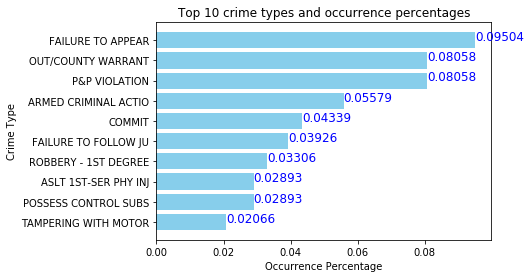

In [20]:
fig, ax = plt.subplots()
types = [item[0] for item in top10[::-1]]
proportion = [item[1] for item in top10[::-1]] 
#plot a horizontal bar plot
plt.barh([*range(10)], proportion, align='center', color = 'skyblue')
plt.yticks([*range(10)], types)
plt.ylabel("Crime Type")
plt.xlabel("Occurrence Percentage")
plt.title("Top 10 crime types and occurrence percentages")
#all text values to each bar
for i,v in enumerate(proportion):
    ax.text(v, i, str(v), color='blue', fontsize=12)
plt.show()